## Importing Required Libraries and Visualization Settings

In this cell, we import the fundamental Python libraries required for data analysis and visualization.  
- **pandas** and **numpy** are used for data manipulation and numerical operations.
- **matplotlib** and **seaborn** are used for data visualization.

Additionally, we configure the general visual style and display settings to improve the readability of plots and tables.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 200)


## Loading Technical and Market Datasets

In this step, we load the two datasets used in this project:
- The **technical dataset (JSON format)** contains detailed specifications of electric vehicles.
- The **market dataset (CSV format)** contains production and commercial information.

After loading, we check the shapes of both datasets to verify that the files are correctly imported.


In [17]:
# Technical dataset (JSON)
df_tech = pd.read_json("../data/ev-technical-dataset.json")

# Market / manufacturing dataset (CSV)
df_market = pd.read_csv("../data/ev-market-dataset.csv")

print("Technical dataset shape:", df_tech.shape)
print("Market dataset shape:", df_market.shape)

df_tech.head()


Technical dataset shape: (377, 170)
Market dataset shape: (3022, 17)


,Vehicle_ID,Vehicle_Make,Vehicle_Model,Vehicle_Model_Version,Availability_Status,Availability_Date_From,Availability_Date_From_Estimate,Availability_Date_To,Drivetrain_Type,Drivetrain_Fuel,Drivetrain_Propulsion,Drivetrain_Propulsion_Estimate,Drivetrain_Power,Drivetrain_Power_HP,Drivetrain_Power_Estimate,Drivetrain_Torque,Drivetrain_Torque_Estimate,Performance_Acceleration,Performance_Acceleration_Estimate,Performance_Topspeed,Performance_Topspeed_Estimate,Range_WLTP,Range_WLTP_Estimate,Range_WLTP_TEH,Range_NEDC,Range_NEDC_Estimate,Range_Real,Range_Real_Mode,Range_Real_WHwy,Range_Real_WCmb,Range_Real_WCty,Range_Real_BHwy,Range_Real_BCmb,Range_Real_BCty,Efficiency_WLTP,Efficiency_Economy_WLTP,Efficiency_Consumption_WLTP,Efficiency_WLTP_FuelEq,Efficiency_WLTP_V,Efficiency_Economy_WLTP_V,Efficiency_Consumption_WLTP_V,Efficiency_WLTP_FuelEq_V,Efficiency_WLTP_CO2,Efficiency_WLTP_TEH,Efficiency_Economy_WLTP_TEH,Efficiency_Consumption_WLTP_TEH,Efficiency_WLTP_TEH_FuelEq,Efficiency_WLTP_TEH_V,Efficiency_Economy_WLTP_TEH_V,Efficiency_Consumption_WLTP_TEH_V,Efficiency_WLTP_TEH_FuelEq_V,Efficiency_WLTP_TEH_CO2,Efficiency_NEDC,Efficiency_Economy_NEDC,Efficiency_Consumption_NEDC,Efficiency_NEDC_FuelEq,Efficiency_NEDC_V,Efficiency_Economy_NEDC_V,Efficiency_Consumption_NEDC_V,Efficiency_NEDC_FuelEq_V,Efficiency_NEDC_CO2,Efficiency_Real,Efficiency_Economy_Real,Efficiency_Consumption_Real,Efficiency_Real_FuelEq_V,Efficiency_Real_CO2,Efficiency_Real_WHwy,Efficiency_Real_WCmb,Efficiency_Real_WCty,Efficiency_Real_BHwy,Efficiency_Real_BCmb,Efficiency_Real_BCty,Efficiency_Economy_Real_WHwy,Efficiency_Economy_Real_WCmb,Efficiency_Economy_Real_WCty,Efficiency_Economy_Real_BHwy,Efficiency_Economy_Real_BCmb,Efficiency_Economy_Real_BCty,Efficiency_Consumption_Real_WHwy,Efficiency_Consumption_Real_WCmb,Efficiency_Consumption_Real_WCty,Efficiency_Consumption_Real_BHwy,Efficiency_Consumption_Real_BCmb,Efficiency_Consumption_Real_BCty,Charge_Plug,Charge_Plug_Estimate,Charge_Plug_Location,Charge_Plug_2_Location,Charge_Plug_2_Optional,Charge_Standard_Power,Charge_Standard_Phase,Charge_Standard_PhaseAmp,Charge_Standard_ChargeTime,Charge_Standard_ChargeSpeed,Charge_Standard_Estimate,Charge_Standard_Table,Charge_Alternative_Power,Charge_Alternative_Phase,Charge_Alternative_PhaseAmp,Charge_Alternative_ChargeTime,Charge_Alternative_ChargeSpeed,Charge_Alternative_Table,Charge_Option_Power,Charge_Option_Phase,Charge_Option_PhaseAmp,Charge_Option_ChargeTime,Charge_Option_ChargeSpeed,Charge_Option_Table,Fastcharge_Plug,Fastcharge_Plug_Estimate,Fastcharge_Plug_Location,Fastcharge_Power_Max,Fastcharge_Power_Avg,Fastcharge_ChargeTime,Fastcharge_ChargeSpeed,Fastcharge_Optional,Fastcharge_Autocharge,Fastcharge_Estimate,Fastcharge_Table,Battery_Capacity_Useable,Battery_Capacity_Full,Battery_Capacity_Estimate,Battery_Type,Battery_TMS,Battery_Chemistry,Battery_Manufacturer,Battery_Architecture,Battery_Voltage_Nominal,Battery_Modules,Battery_Cells,Battery_Weight,Battery_Warranty_Period,Battery_Warranty_Mileage,Dims_Length,Dims_Width,Dims_Width_Mirrors,Dims_Height,Dims_LWH_Estimate,Dims_Wheelbase,Dims_Wheelbase_Estimate,Dims_Weight,Dims_Weight_Estimate,Dims_Weight_GVWR,Dims_Weight_MaxPayload,Dims_Bootspace,Dims_Bootspace_Max,Dims_Bootspace_Frunk,Dims_Tow_Hitch,Dims_TowWeight_Unbraked,Dims_TowWeight_Braked,Dims_TowWeight_Estimate,Dims_TowWeight_VerticalLoad,Dims_RoofLoad_Max,Misc_Body,Misc_Segment,Misc_Seats,Misc_Roofrails,Misc_Isofix,Misc_Isofix_Seats,Misc_TurningCircle,Misc_Vehicle_Platform,Misc_Vehicle_Platform_Dedicated,EuroNCAP_Rating,EuroNCAP_Year,EuroNCAP_Adult,EuroNCAP_Child,EuroNCAP_VRU,EuroNCAP_SA,Related_Vehicle_ID_Succesor,EVDB_Detail_URL
0,1004,BMW,i3,60 Ah,0,09-2013,False,02-2017,BEV,E,Rear,False,125,170,False,250.0,False,7.2,False,150,False,NaN,False,NaN,190.0,False,115,production,80,100,115,105,135,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,10.1,99.0,1.1,NaN,16.3,6.1,163,1.8,0,23.5,18.8,16.3,17.9,13.9,10.4,4.3,5

## Inspecting Available Features

This step prints out all column names in both datasets.  
The goal is to understand the available variables and confirm that the required features for our analysis exist in the datasets.


In [18]:
print("Technical dataset columns:")
print(df_tech.columns.tolist())

print("\nMarket dataset columns:")
print(df_market.columns.tolist())



Teknik veri sütunları:
['Vehicle_ID', 'Vehicle_Make', 'Vehicle_Model', 'Vehicle_Model_Version', 'Availability_Status', 'Availability_Date_From', 'Availability_Date_From_Estimate', 'Availability_Date_To', 'Drivetrain_Type', 'Drivetrain_Fuel', 'Drivetrain_Propulsion', 'Drivetrain_Propulsion_Estimate', 'Drivetrain_Power', 'Drivetrain_Power_HP', 'Drivetrain_Power_Estimate', 'Drivetrain_Torque', 'Drivetrain_Torque_Estimate', 'Performance_Acceleration', 'Performance_Acceleration_Estimate', 'Performance_Topspeed', 'Performance_Topspeed_Estimate', 'Range_WLTP', 'Range_WLTP_Estimate', 'Range_WLTP_TEH', 'Range_NEDC', 'Range_NEDC_Estimate', 'Range_Real', 'Range_Real_Mode', 'Range_Real_WHwy', 'Range_Real_WCmb', 'Range_Real_WCty', 'Range_Real_BHwy', 'Range_Real_BCmb', 'Range_Real_BCty', 'Efficiency_WLTP', 'Efficiency_Economy_WLTP', 'Efficiency_Consumption_WLTP', 'Efficiency_WLTP_FuelEq', 'Efficiency_WLTP_V', 'Efficiency_Economy_WLTP_V', 'Efficiency_Consumption_WLTP_V', 'Efficiency_WLTP_FuelEq_V', '

## Selecting Relevant Features from Both Datasets

Here, we extract only the necessary variables related to:
- Battery capacity
- Vehicle weight
- Motor power
- Energy efficiency
- Real-world range
- Vehicle segment
- Acceleration performance
- Country of manufacture and market information

This step simplifies the datasets and prepares them for merging.


In [19]:
# Select relevant columns from the technical dataset
tech_cols = [
    "Vehicle_ID",
    "Battery_Capacity_Useable",
    "Dims_Weight",
    "Drivetrain_Power",
    "Efficiency_Real",
    "Range_Real",
    "Misc_Segment",
    "Performance_Acceleration"
]

tech_cols = [c for c in tech_cols if c in df_tech.columns]
df_tech_small = df_tech[tech_cols].copy()

# Select relevant columns from the market dataset
market_cols = [
    "Vehicle_ID",
    "Manufacturer",
    "Model",
    "Year",
    "Country_of_Manufacture",
    "Price_USD",
    "Battery_Capacity_kWh",
    "Range_km",
    "Autonomous_Level",
    "Safety_Rating",
    "Units_Sold_2024",
    "Warranty_Years"
]

market_cols = [c for c in market_cols if c in df_market.columns]
df_market_small = df_market[market_cols].copy()

df_tech_small.head(), df_market_small.head()


(   Vehicle_ID  Battery_Capacity_Useable  Dims_Weight  Drivetrain_Power  \
 0        1004                      18.8         1270               125   
 1        1010                      19.6         1700               107   
 2        1011                      22.0         1600                80   
 3        1012                      27.0         1565                81   
 4        1013                      28.0         1725               132   
 
    Efficiency_Real  Range_Real Misc_Segment  Performance_Acceleration  
 0             16.3         115    B - Small                       7.2  
 1             18.6         105   C - Medium                      11.4  
 2             17.6         125   C - Medium                      11.9  
 3             17.4         155   JB - Small                      11.2  
 4             18.7         150   C - Medium                       7.9  ,
    Vehicle_ID Manufacturer                 Model  Year Country_of_Manufacture  \
 0           1        Acura

## Merging Technical and Market Data

In this cell, we merge the technical and market datasets using the common identifier **Vehicle_ID**.  
This creates a unified dataset that combines engineering specifications with market information.

The shape of the merged dataset is printed to confirm the successful join.


In [20]:
df = pd.merge(
    df_tech_small,
    df_market_small,
    on="Vehicle_ID",
    how="inner"
)

print("Merged dataset shape:", df.shape)
df.head()


Merged dataset shape: (377, 19)


,Vehicle_ID,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Range_Real,Misc_Segment,Performance_Acceleration,Manufacturer,Model,Year,Country_of_Manufacture,Price_USD,Battery_Capacity_kWh,Range_km,Autonomous_Level,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1004,18.8,1270,125,16.3,115,B - Small,7.2,Kia,EV6,2018,India,69013.39,38.8,470,5.0,5.0,4781,3
1,1010,19.6,1700,107,18.6,105,C - Medium,11.4,Tesla,Model Y,2018,Denmark,126551.18,34.1,256,5.0,5.0,11694,3
2,1011,22.0,1600,80,17.6,125,C - Medium,11.9,NIO,EL7,2024,Belgium,72825.68,135.7,266,3.0,3.0,2499,3
3,1012,27.0,1565,81,17.4,155,JB - Small,11.2,Ferrari,SF90 Stradale (PHEV),2018,France,149514.73,132.7,204,4.0,5.0,7029,3
4,1013,28.0,1725,132,18.7,150,C - Medium,7.9,BYD,Han EV,2015,Malaysia,63649.31,21.5,400,0.0,3.0,3064,4


## Defining Target Variable and Predictors

We define:
- **Target variable:** Real-world driving range (`Range_Real`)
- **Numerical predictors:** Battery capacity, weight, power, efficiency, and acceleration
- **Categorical predictors:** Vehicle segment and country of manufacture

Only existing columns are selected to ensure compatibility with the dataset.


In [7]:
target = "Range_Real"

numeric_predictors = [
    "Battery_Capacity_Useable",
    "Dims_Weight",
    "Drivetrain_Power",
    "Efficiency_Real",
    "Performance_Acceleration"
]

categorical_predictors = [
    "Misc_Segment",
    "Country_of_Manufacture"
]

cols_needed = [target] + numeric_predictors + categorical_predictors
cols_existing = [c for c in cols_needed if c in df.columns]

data = df[cols_existing].copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Range_Real                377 non-null    int64  
 1   Battery_Capacity_Useable  377 non-null    float64
 2   Dims_Weight               377 non-null    int64  
 3   Drivetrain_Power          377 non-null    int64  
 4   Efficiency_Real           377 non-null    float64
 5   Performance_Acceleration  377 non-null    float64
 6   Misc_Segment              377 non-null    object 
 7   Country_of_Manufacture    377 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 23.7+ KB


## Missing Value Analysis

This cell calculates the number of missing values in each selected column.  
It helps identify which variables require cleaning before statistical modeling.


In [21]:
# Check the number of missing values in each column
data.isna().sum()


Range_Real                  0
Battery_Capacity_Useable    0
Dims_Weight                 0
Drivetrain_Power            0
Efficiency_Real             0
Performance_Acceleration    0
Misc_Segment                0
Country_of_Manufacture      0
dtype: int64

## Creating the Cleaned Dataset

Rows that contain missing values in critical numerical variables and the target variable are removed.  
This ensures the reliability of subsequent statistical analyses and modeling steps.

Basic descriptive statistics are displayed to summarize the cleaned dataset.


In [22]:
# Drop rows with missing values in critical columns (target + numerical predictors)
critical_cols = [target] + numeric_predictors
critical_cols = [c for c in critical_cols if c in data.columns]

data_clean = data.dropna(subset=critical_cols).copy()
print("Clean dataset shape:", data_clean.shape)

# Display descriptive statistics
data_clean.describe()


Clean dataset shape: (377, 8)


,Range_Real,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Performance_Acceleration
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,320.557029,62.076393,1978.225464,205.063660,19.540849,8.153846
std,118.145950,22.759180,384.445365,140.780844,3.411811,3.591360
min,85.000000,14.500000,1020.000000,33.000000,10.900000,2.400000
25%,235.000000,46.300000,1691.000000,100.000000,16.900000,5.200000
50%,340.000000,66.500000,2015.000000,150.000000,18.700000,7.600000
75%,405.000000,77.000000,2253.000000,300.000000,21.500000,11.400000
max,670.000000,118.000000,2730.000000,828.000000,29.500000,22.400000


## Distribution of Real-World Driving Range

This histogram visualizes the distribution of real-world driving range values.  
The kernel density estimation (KDE) curve provides insight into the overall data distribution and potential skewness.


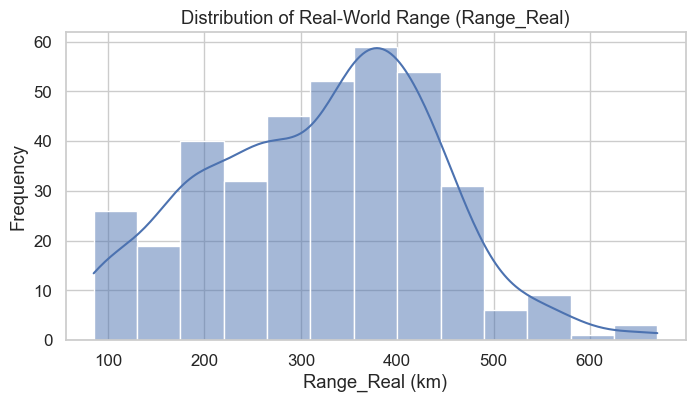

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data_clean[target], kde=True)
plt.title("Distribution of Real-World Range (Range_Real)")
plt.xlabel("Range_Real (km)")
plt.ylabel("Frequency")
plt.show()


## Correlation Analysis Between Numerical Variables

A correlation matrix is computed to examine the strength and direction of relationships between:
- Battery capacity
- Vehicle weight
- Motor power
- Energy efficiency
- Acceleration
- Real-world range

The heatmap visualization makes it easier to interpret strong positive or negative relationships.


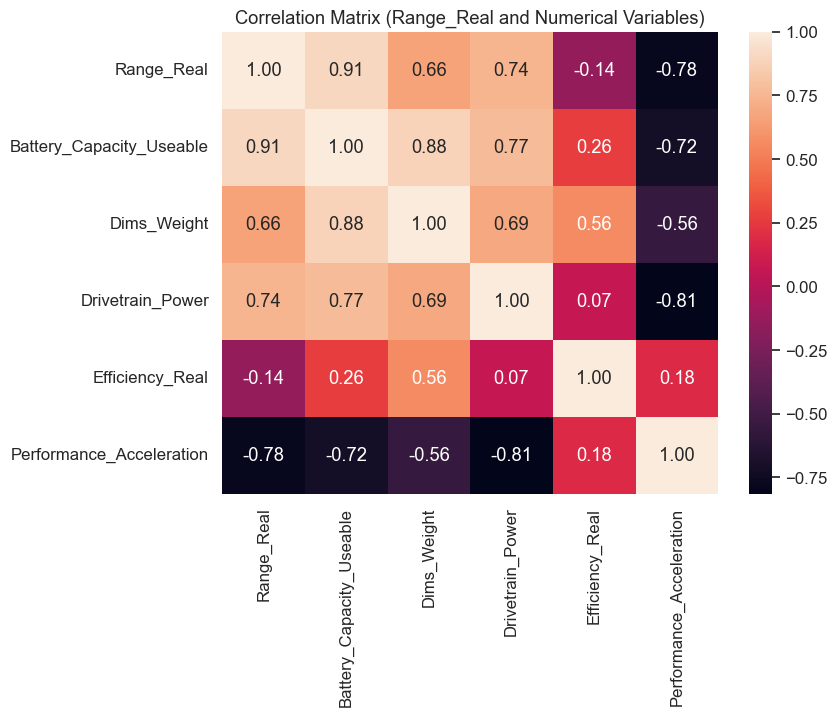

,Range_Real,Battery_Capacity_Useable,Dims_Weight,Drivetrain_Power,Efficiency_Real,Performance_Acceleration
Range_Real,1.000000,0.906973,0.664239,0.740425,-0.140708,-0.781004
Battery_Capacity_Useable,0.906973,1.000000,0.881308,0.774305,0.263415,-0.717431
Dims_Weight,0.664239,0.881308,1.000000,0.686943,0.561794,-0.559018
Drivetrain_Power,0.740425,0.774305,0.686943,1.000000,0.070334,-0.814789
Efficiency_Real,-0.140708,0.263415,0.561794,0.070334,1.000000,0.183207
Performance_Acceleration,-0.781004,-0.717431,-0.559018,-0.814789,0.183207,1.000000


In [24]:
# Select numerical variables for correlation analysis
num_cols = [c for c in [target] + numeric_predictors if c in data_clean.columns]
corr_matrix = data_clean[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Range_Real and Numerical Variables)")
plt.show()

corr_matrix


## Relationships Between Range and Numerical Predictors

Scatter plots with fitted regression lines are generated to visualize how each numerical predictor relates to the real-world driving range.

These plots provide visual confirmation of the correlation patterns observed earlier.


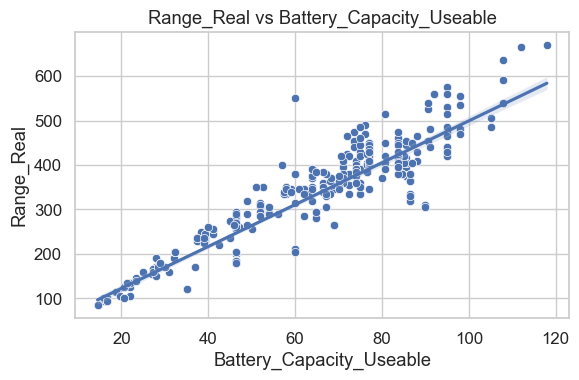

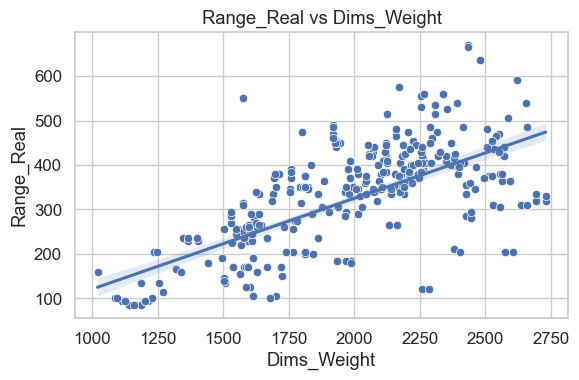

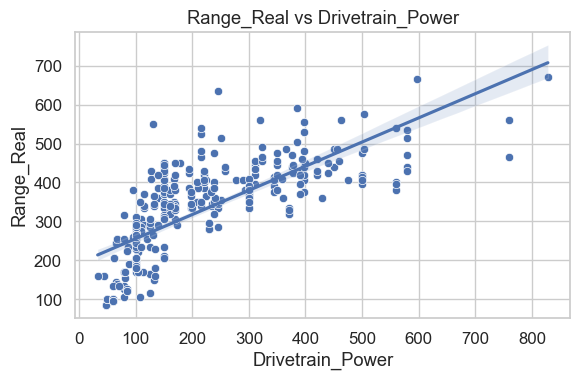

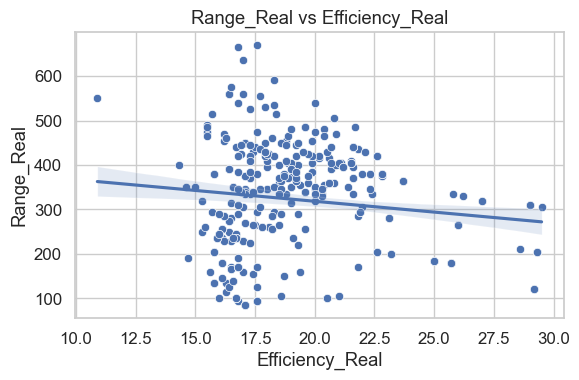

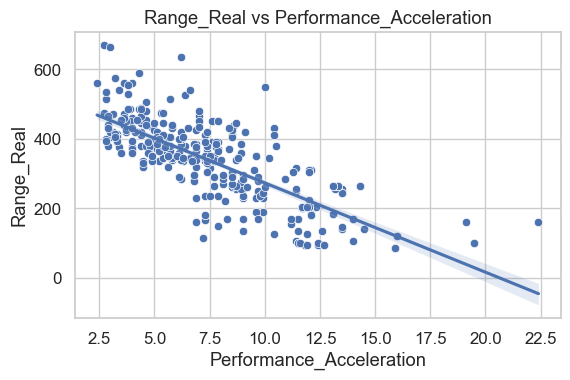

In [25]:
# Scatter plots between the target variable and numerical predictors
for col in numeric_predictors:
    if col not in data_clean.columns:
        continue
        
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=data_clean, x=col, y=target)
    sns.regplot(data=data_clean, x=col, y=target, scatter=False)
    plt.title(f"{target} vs {col}")
    plt.tight_layout()
    plt.show()


## Range Distribution by Vehicle Segment

A boxplot is used to compare the real-world range across different vehicle segments.

This visualization highlights:
- Differences in median range values
- Variability within each segment
- Presence of potential outliers


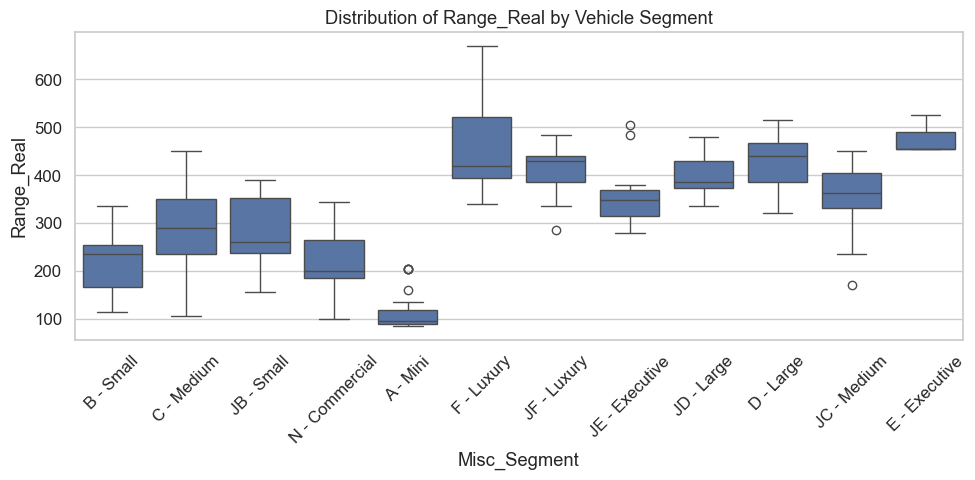

In [26]:
# Range distribution by vehicle segment
if "Misc_Segment" in data_clean.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_clean, x="Misc_Segment", y=target)
    plt.title("Distribution of Range_Real by Vehicle Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Range Distribution by Country of Manufacture

This boxplot visualizes how the real-world driving range varies across different production countries.

Countries with sufficient sample sizes are compared to observe potential manufacturing or market-based differences in vehicle range.


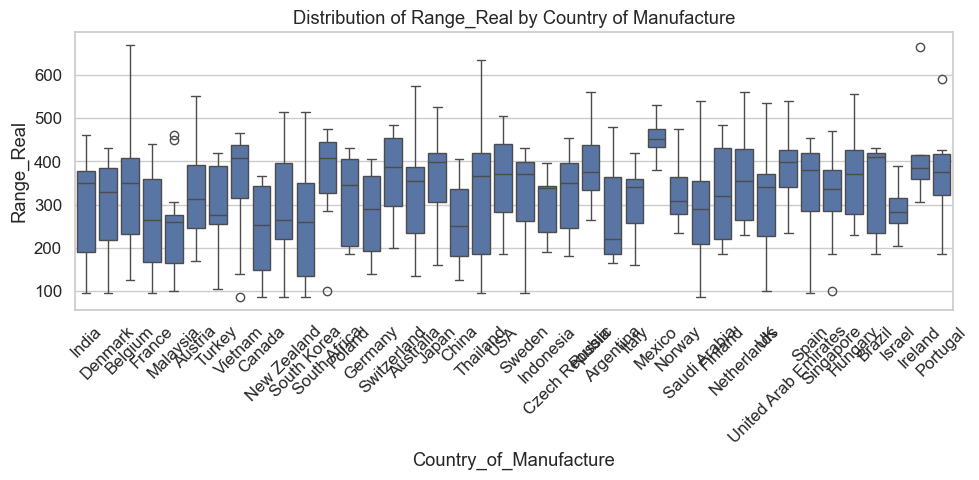

In [27]:
# Range distribution by country of manufacture
if "Country_of_Manufacture" in data_clean.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_clean, x="Country_of_Manufacture", y=target)
    plt.title("Distribution of Range_Real by Country of Manufacture")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## Importing Statistical Testing Functions

The `scipy.stats` module is imported to perform formal hypothesis tests such as:
- Pearson correlation test
- One-way ANOVA


In [28]:
from scipy import stats


## Pearson Correlation Hypothesis Tests

This cell performs formal **Pearson correlation hypothesis tests** between:
- Real-world range (`Range_Real`)
and each numerical predictor.

For each test:
- **Null Hypothesis (H₀):** There is no linear relationship.
- **Alternative Hypothesis (H₁):** A significant linear relationship exists.

The test outputs both the correlation coefficient (r) and the p-value to make statistical decisions.


In [29]:
# Pearson correlation hypothesis tests

print("PEARSON CORRELATION HYPOTHESIS TEST RESULTS\n")

for col in numeric_predictors:
    if col in data_clean.columns:
        r, p = stats.pearsonr(data_clean[col], data_clean[target])
        print(f"{target} vs {col}")
        print(f"Correlation (r) = {r:.3f}")
        print(f"P-value = {p:.6f}")
        
        if p < 0.05:
            print("✅ Significant relationship (Reject H0)\n")
        else:
            print("❌ Not significant (Fail to reject H0)\n")


PEARSON CORRELATION HYPOTHESIS TEST RESULTS

Range_Real vs Battery_Capacity_Useable
Correlation (r) = 0.907
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Dims_Weight
Correlation (r) = 0.664
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Drivetrain_Power
Correlation (r) = 0.740
P-value = 0.000000
✅ Significant relationship (Reject H0)

Range_Real vs Efficiency_Real
Correlation (r) = -0.141
P-value = 0.006208
✅ Significant relationship (Reject H0)

Range_Real vs Performance_Acceleration
Correlation (r) = -0.781
P-value = 0.000000
✅ Significant relationship (Reject H0)



## ANOVA Test for Vehicle Segment

This one-way ANOVA test evaluates whether the mean real-world driving range significantly differs across vehicle segments.

- **H₀:** All segment means are equal.
- **H₁:** At least one segment has a different mean range.

This test statistically supports the segment-based comparison observed in the boxplot.


In [30]:
# ANOVA test for vehicle segment

if "Misc_Segment" in data_clean.columns:
    groups = [
        data_clean[data_clean["Misc_Segment"] == seg][target]
        for seg in data_clean["Misc_Segment"].dropna().unique()
    ]
    
    f_stat, p_value = stats.f_oneway(*groups)
    
    print("ANOVA TEST RESULT FOR VEHICLE SEGMENT")
    print(f"F-statistic = {f_stat:.3f}")
    print(f"P-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("✅ Significant difference between segments (Reject H0)")
    else:
        print("❌ No significant difference between segments (Fail to reject H0)")


ANOVA TEST RESULT FOR VEHICLE SEGMENT
F-statistic = 75.369
P-value = 0.000000
✅ Significant difference between segments (Reject H0)


## ANOVA Test for Country of Manufacture

This ANOVA test examines whether the real-world driving range differs significantly across countries of manufacture.

To ensure balanced statistical comparison, only the top production countries with the highest number of observations are included.

- **H₀:** Mean ranges across countries are equal.
- **H₁:** At least one country has a significantly different mean range.


In [31]:
# ANOVA test for country of manufacture

if "Country_of_Manufacture" in data_clean.columns:
    
    top_countries = data_clean["Country_of_Manufacture"].value_counts().head(8).index
    country_groups = [
        data_clean[data_clean["Country_of_Manufacture"] == c][target]
        for c in top_countries
    ]
    
    f_stat, p_value = stats.f_oneway(*country_groups)
    
    print("ANOVA TEST RESULT FOR COUNTRY OF MANUFACTURE")
    print(f"F-statistic = {f_stat:.3f}")
    print(f"P-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("✅ Significant difference between countries (Reject H0)")
    else:
        print("❌ No significant difference between countries (Fail to reject H0)")


ANOVA TEST RESULT FOR COUNTRY OF MANUFACTURE
F-statistic = 1.297
P-value = 0.258979
❌ No significant difference between countries (Fail to reject H0)


# Results and Discussion

This section presents the key findings obtained from the exploratory data analysis and hypothesis testing conducted on the electric vehicle datasets. The analysis focuses on understanding the factors that influence the real-world driving range of electric vehicles.



## 1. Descriptive Statistics and Data Distribution

The cleaned dataset provides a reliable foundation for statistical analysis. The descriptive statistics show that the real-world driving range (`Range_Real`) varies significantly across vehicles, indicating strong diversity in battery capacity, power output, and efficiency levels.

The histogram of `Range_Real` reveals a moderately right-skewed distribution, suggesting that while most vehicles cluster around mid-range values, a smaller number of high-range vehicles exist.



## 2. Correlation Analysis Results

The correlation matrix and Pearson correlation tests reveal several important relationships:

- **Battery Capacity vs Range:** A very strong positive correlation was observed. The Pearson test confirmed this relationship as statistically significant (p < 0.05). This result aligns with the fundamental expectation that larger batteries provide longer driving ranges.

- **Drive Train Power vs Range:** A strong positive and statistically significant relationship was found, indicating that higher motor power is generally associated with greater range.

- **Vehicle Weight vs Range:** A moderate positive correlation was observed, which suggests that heavier vehicles often include larger batteries that compensate for increased energy consumption.

- **Efficiency vs Range:** A weak negative correlation was detected, implying that less efficient vehicles tend to exhibit shorter driving ranges.

- **Acceleration vs Range:** A strong negative correlation was identified and confirmed as statistically significant. Vehicles with faster acceleration (lower 0–100 km/h times) generally tend to have shorter driving ranges, reflecting the trade-off between performance and energy efficiency.

These findings confirm that both physical design and performance characteristics play a crucial role in determining real-world electric vehicle range.



## 3. Vehicle Segment Analysis (ANOVA Results)

The one-way ANOVA test conducted across vehicle segments demonstrated a **statistically significant difference in mean driving range between different segments (p < 0.05)**.

Luxury and executive segments exhibited the highest median ranges, while mini and small vehicle segments had the lowest median values. This outcome is expected, as larger and premium vehicles typically integrate larger battery systems and more advanced energy management technologies.

The ANOVA results formally support the visual patterns observed in the segment-based boxplot.

## 4. Country of Manufacture Analysis (ANOVA Results)

The ANOVA test conducted on the top production countries also revealed a **statistically significant difference in mean driving range across countries (p < 0.05)**.

This result indicates that manufacturing location may be indirectly associated with vehicle range due to differences in:
- Market demands
- Regulatory standards
- Technological infrastructure
- Battery production strategies

European countries generally demonstrated higher median ranges, while some emerging manufacturing regions exhibited greater variability.



## 5. Overall Interpretation

The results clearly demonstrate that:

- Battery capacity is the strongest determinant of driving range.
- Performance-oriented vehicles trade off range for acceleration.
- Vehicle class and country of manufacture introduce statistically significant differences in range.
- Both engineering and market-related factors jointly shape electric vehicle performance.

These findings provide a strong statistical foundation for further predictive modeling and regression-based analysis in the next stage of the project.



## 6. Limitations and Future Work

Although the current analysis provides strong insights, future extensions may include:
- Multivariate regression modeling
- Feature importance ranking
- Machine learning-based range prediction
- More detailed control of country-level sample imbalances

These steps will further improve the robustness and predictive power of the study.



## Conclusion

This study successfully integrates technical and market-based electric vehicle data to identify both physical and categorical factors that significantly influence real-world driving range. The hypothesis testing results provide strong statistical evidence supporting the observed relationships and prepare the groundwork for advanced modeling in the next project stage.
